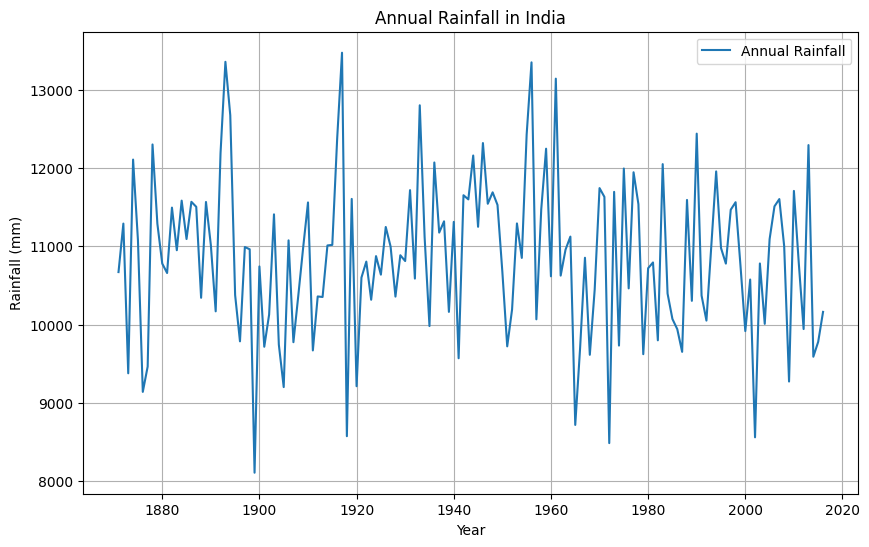

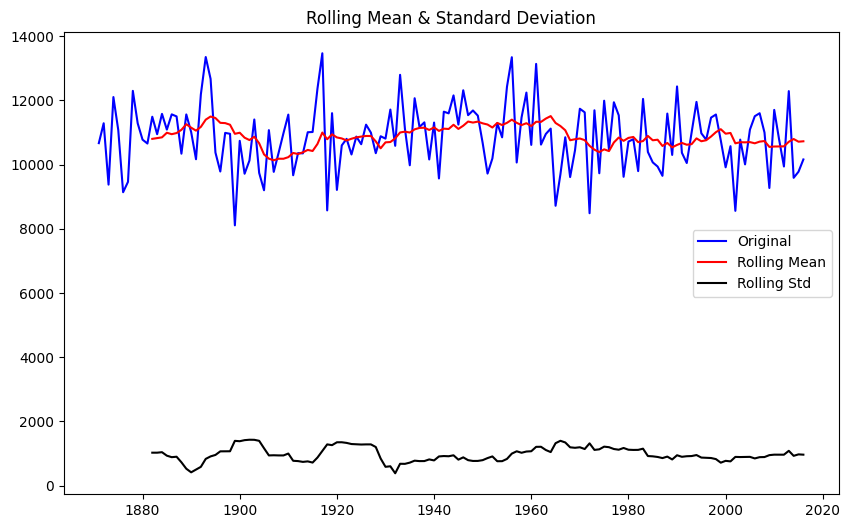

Test Statistic                -1.205014e+01
p-value                        2.608883e-22
#Lags Used                     0.000000e+00
Number of Observations Used    1.450000e+02
Critical Value (1%)           -3.476273e+00
Critical Value (5%)           -2.881688e+00
Critical Value (10%)          -2.577513e+00
dtype: float64


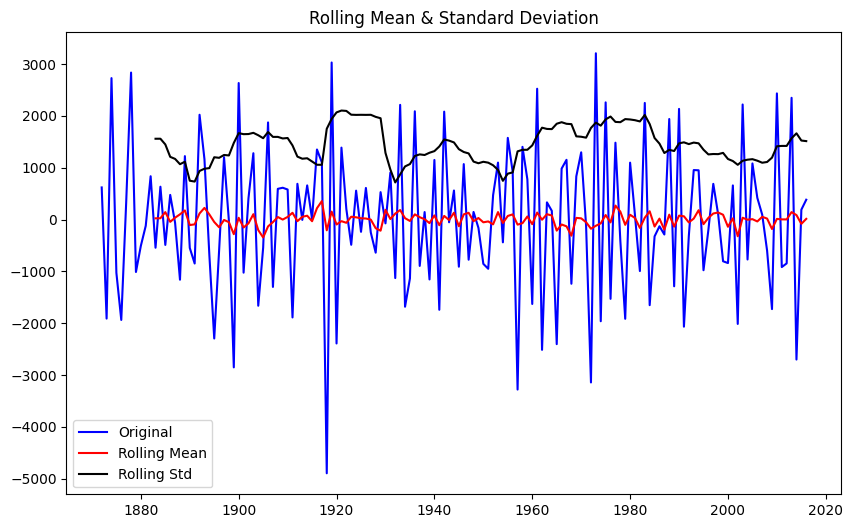

Test Statistic                -8.644081e+00
p-value                        5.328815e-14
#Lags Used                     5.000000e+00
Number of Observations Used    1.390000e+02
Critical Value (1%)           -3.478294e+00
Critical Value (5%)           -2.882568e+00
Critical Value (10%)          -2.577983e+00
dtype: float64


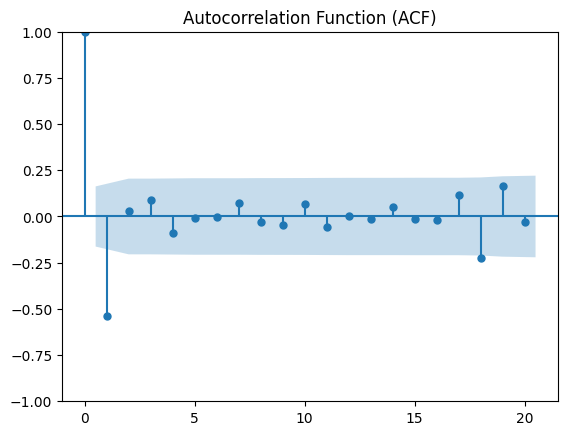

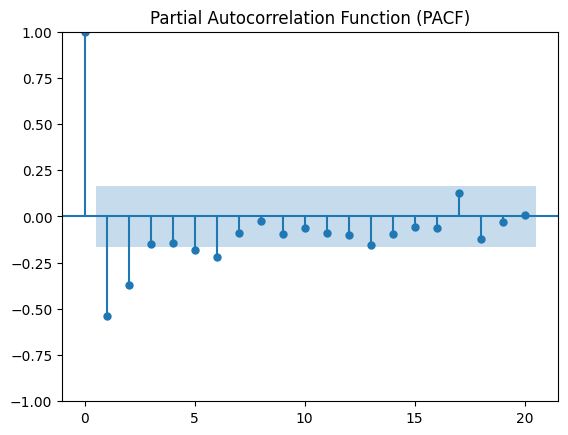

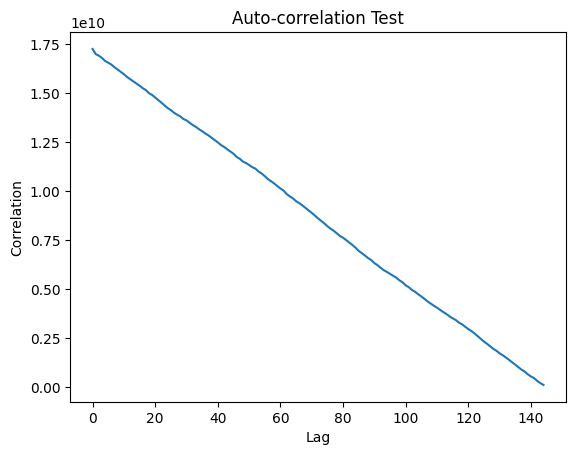

The data is homogeneous.
Slope: -1.3753660840812472
Intercept: 10959.42635805385
R-squared: 0.0032260630827007425
p-value: 0.49740888763383695


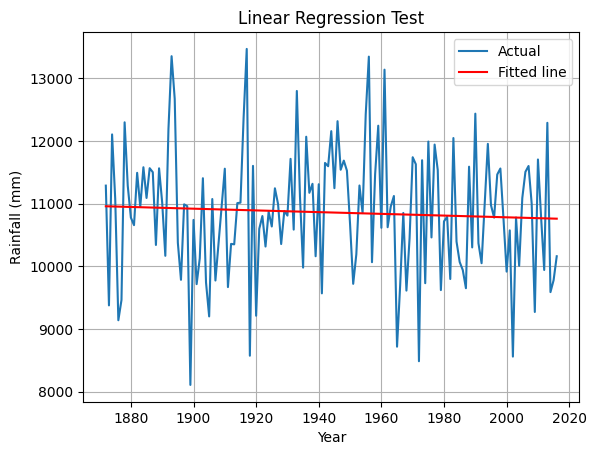

Mann-Kendall Test:
U statistic: 2637.5
p-value: 0.9716091584138602
There is no significant trend.
Sen's Slope Estimator Test:
Slope: -1.1762749445676275


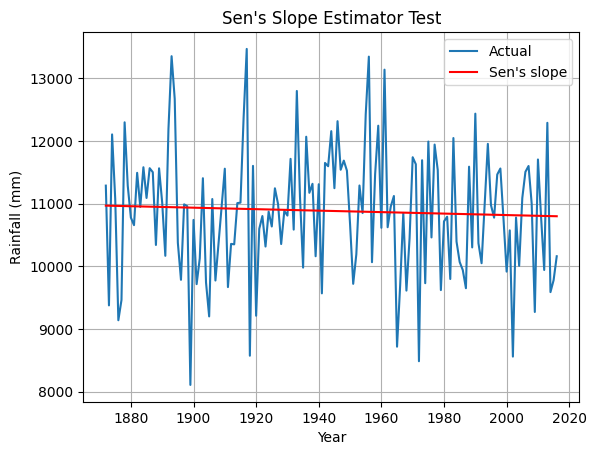

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from scipy.stats import kendalltau
from scipy.stats import mannwhitneyu
from scipy.stats import theilslopes


# Load the dataset from an Excel file
# Assuming your dataset is stored in an Excel file named 'rainfall_data.xlsx'
df = pd.read_excel('rainfall_data.xlsx')

# Convert the 'YEAR' column to datetime format and set it as the index
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')
df.set_index('YEAR', inplace=True)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['ANN'], label='Annual Rainfall')
plt.title('Annual Rainfall in India')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

# Check for stationarity using rolling statistics and Dickey-Fuller test
def check_stationarity(timeseries):
    # Rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Dickey-Fuller test
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Check stationarity
check_stationarity(df['ANN'])

# Differencing to achieve stationarity
df['Diff'] = df['ANN'].diff(periods=1)
df.dropna(inplace=True)

# Check stationarity after differencing
check_stationarity(df['Diff'])

# Plot ACF and PACF
plot_acf(df['Diff'], lags=20)
plt.title('Autocorrelation Function (ACF)')
plt.show()

plot_pacf(df['Diff'], lags=20)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Auto-correlation test
def auto_correlation_test(timeseries):
    acorr = np.correlate(timeseries, timeseries, mode='full')
    acorr = acorr[len(acorr)//2:]
    plt.plot(acorr)
    plt.title('Auto-correlation Test')
    plt.xlabel('Lag')
    plt.ylabel('Correlation')
    plt.show()

# Homogeneity test using Kruskal-Wallis H-test
def homogeneity_test(timeseries):
    mid_point = len(timeseries) // 2
    group1 = timeseries[:mid_point]
    group2 = timeseries[mid_point:]
    stat, p_value = stats.kruskal(group1, group2)
    if p_value < 0.05:
        print("The data is not homogeneous.")
    else:
        print("The data is homogeneous.")

# Linear regression test
def linear_regression_test(timeseries):
    x = np.arange(len(timeseries)).reshape(-1, 1)
    y = timeseries.values.reshape(-1, 1)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.ravel(), y.ravel())
    print("Slope:", slope)
    print("Intercept:", intercept)
    print("R-squared:", r_value**2)
    print("p-value:", p_value)
    plt.plot(timeseries.index, timeseries, label='Actual')
    plt.plot(timeseries.index, intercept + slope*x, 'r', label='Fitted line')
    plt.title('Linear Regression Test')
    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Mann-Kendall (MK) test
def mann_kendall_test(timeseries):
    n = len(timeseries)
    mid_point = n // 2
    group1 = timeseries[:mid_point]
    group2 = timeseries[mid_point:]
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    print("Mann-Kendall Test:")
    print("U statistic:", stat)
    print("p-value:", p_value)
    if p_value < 0.05:
        print("There is a significant trend.")
    else:
        print("There is no significant trend.")

# Sen’s slope estimator test
def sens_slope_estimator_test(timeseries):
    slope, intercept, lo_slope, up_slope = theilslopes(timeseries, alpha=0.05)
    print("Sen's Slope Estimator Test:")
    print("Slope:", slope)
    plt.plot(timeseries.index, timeseries, label='Actual')
    plt.plot(timeseries.index, intercept + slope*np.arange(len(timeseries)), 'r', label='Sen\'s slope')
    plt.title('Sen\'s Slope Estimator Test')
    plt.xlabel('Year')
    plt.ylabel('Rainfall (mm)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Perform tests
auto_correlation_test(df['ANN'])
homogeneity_test(df['ANN'])
linear_regression_test(df['ANN'])
mann_kendall_test(df['ANN'])
sens_slope_estimator_test(df['ANN'])